HELP International is an international humanitarian NGO that is committed to 
fighting poverty and providing the people of backward countries with basic 
amenities and relief during the time of disasters and natural calamities. After 
the recent project that included a lot of awareness drives and funding 
programmes, they have been able to raise around $ 10 million. The significant 
issues that come while making this decision are mostly related to choosing the 
countries that are in the direst need of aid.
How will you help this NGO to make a correct decision based on socioeconomic and health factors?

Variables description

country -	Name of the country

child_mort	- Death of children under 5 years of age per 1000 live births

exports	- Exports of goods and services. Given as %age of the Total GDP

health	- Total health spending as %age of Total GDP

imports	- Imports of goods and services. Given as %age of the Total GDP

Income	- Net income per person

Inflation	- The measurement of the annual growth rate of the Total GDP

life_expec	- The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer	- The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp	- The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

Read data into python

In [2]:
country=pd.read_csv(r"D:\DSA - ICT\Week 14\Lark\Country-data.csv")

Check the dataset and get basic information

In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#Only the country name is categorical variable , others are numerical variables in the dataset

Basic statistical summary of the dataset

In [5]:
country.describe().T.style.background_gradient(cmap="YlOrRd")

,count,mean,std,min,25%,50%,75%,max
child_mort,167.000000,38.270060,40.328931,2.600000,8.250000,19.300000,62.100000,208.000000
exports,167.000000,41.108976,27.412010,0.109000,23.800000,35.000000,51.350000,200.000000
health,167.000000,6.815689,2.746837,1.810000,4.920000,6.320000,8.600000,17.900000
imports,167.000000,46.890215,24.209589,0.065900,30.200000,43.300000,58.750000,174.000000
income,167.000000,17144.688623,19278.067698,609.000000,3355.000000,9960.000000,22800.000000,125000.000000
inflation,167.000000,7.781832,10.570704,-4.210000,1.810000,5.390000,10.750000,104.000000
life_expec,167.000000,70.555689,8.893172,32.100000,65.300000,73.100000,76.800000,82.800000
total_fer,167.000000,2.947964,1.513848,1.150000,1.795000,2.410000,3.880000,7.490000
gdpp,167.000000,12964.155689,18328.704809,231.000000,1330.000000,4660.000000,14050.000000,105000.000000


Dimension of the dataset

In [6]:
country.shape

(167, 10)

Checking for the null values

In [7]:
country.isnull().sum().to_frame().style.bar(color="red")

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [8]:
#There are no null values in the dataset

Checking for the skewness

In [9]:
country.skew().sort_values(ascending=False).to_frame().style.bar(color="brown")

C:\Users\Dell\AppData\Local\Temp/ipykernel_11696/2959628260.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  country.skew().sort_values(ascending=False).to_frame().style.bar(color="brown")


,0
inflation,5.154049
exports,2.445824
income,2.231480
gdpp,2.218051
imports,1.905276
child_mort,1.450774
total_fer,0.967092
health,0.705746
life_expec,-0.970996


Life expectancy is left skewed and all other features are right skewed

Checking for the distribution of the variables

Data preparation to do the EDA

Columns Export , health and imports are in percentage , we need to convert these to absolute values for further calculation

In [10]:
country['exports'] = country['exports'] * country['gdpp'] / 100
country['imports'] = country['imports'] * country['gdpp'] / 100
country['health'] = country['health'] * country['gdpp'] / 100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


We can see that the values have changed from percentage to absolute 

Data visualisation

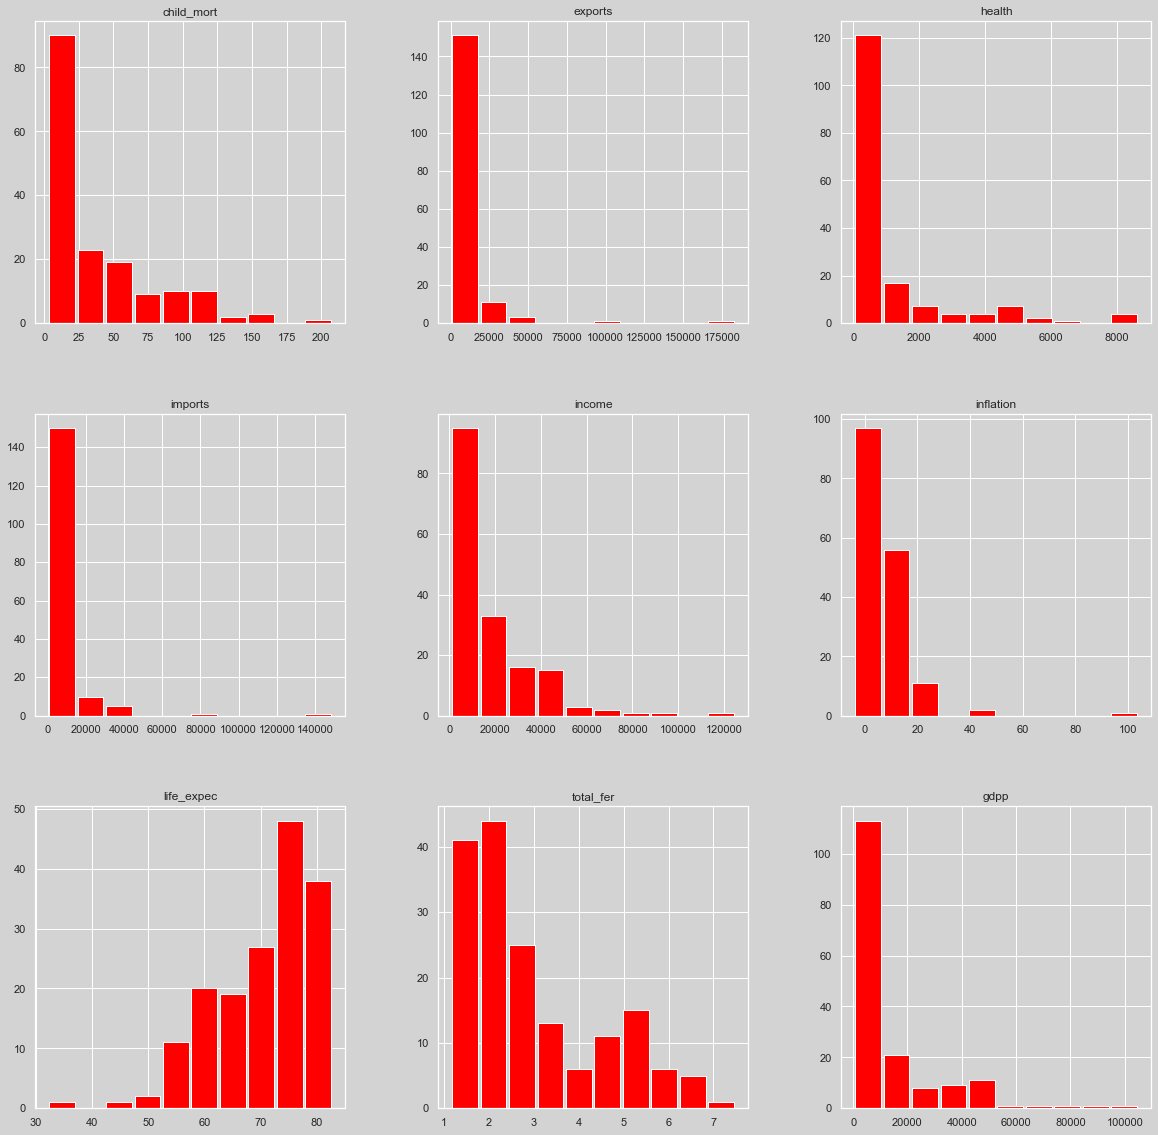

In [11]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
country.hist(figsize=(20,20),rwidth=0.9,color="red")
plt.show()

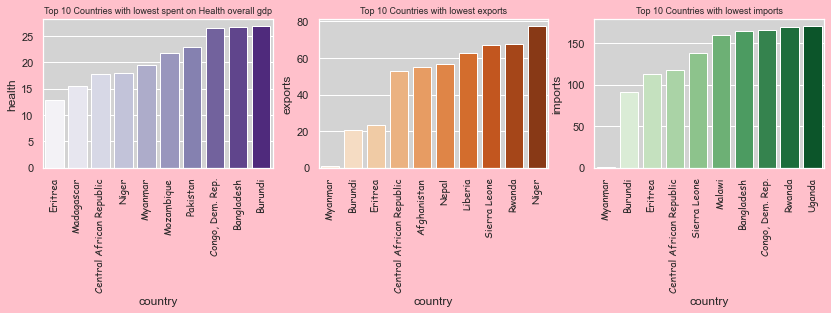

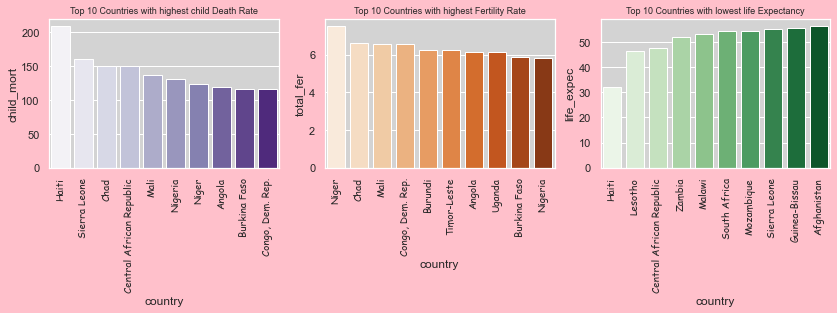

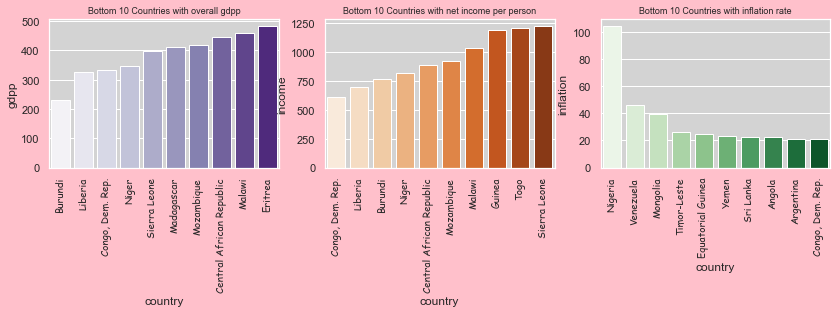

In [12]:
fig = plt.figure(figsize=(14,6))
fig.set_facecolor("pink")

plt.subplot(2,3,1)
# Health :Total health spending as %age of Total GDP.
bottom10_health = country[['country','health']].sort_values('health', ascending = True).head(10)
sns.barplot(x='country',y='health',data=bottom10_health,palette="Purples")
plt.title("Top 10 Countries with lowest spent on Health overall gdp",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.subplot(2,3,2)
bottom10_export = country[['country','exports']].sort_values('exports', ascending = True).head(10)
sns.barplot(x='country',y='exports',data=bottom10_export,palette="Oranges")
plt.title("Top 10 Countries with lowest exports",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.subplot(2,3,3)
bottom10_import = country[['country','imports']].sort_values('imports', ascending = True).head(10)
sns.barplot(x='country',y='imports',data=bottom10_import,palette="Greens")
plt.title("Top 10 Countries with lowest imports",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")


fig = plt.figure(figsize=(14,6))
fig.set_facecolor("pink")

plt.subplot(2,3,1)
# Child Death Rate : Death of children under 5 years of age per 1000 live births
top10_deathrate = country[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country',y='child_mort',data=top10_deathrate,palette="Purples")
plt.title("Top 10 Countries with highest child Death Rate",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family="Comic Sans MS")

plt.subplot(2,3,2)
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_tot_fer = country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
sns.barplot(x='country',y='total_fer',data=top10_tot_fer,palette="Oranges")
plt.title("Top 10 Countries with highest Fertility Rate",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.subplot(2,3,3)
top10_lowest_life_expec = country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
sns.barplot(x='country',y='life_expec',data=top10_lowest_life_expec,palette="Greens")
plt.title("Top 10 Countries with lowest life Expectancy",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

fig = plt.figure(figsize=(14,6))
fig.set_facecolor("pink")

plt.subplot(2,3,1)
# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom10_gdpp = country[['country','gdpp']].sort_values('gdpp',ascending=True).head(10)
sns.barplot(x='country',y='gdpp',data=bottom10_gdpp,palette="Purples")
plt.title("Bottom 10 Countries with overall gdpp",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family="Comic Sans MS")

plt.subplot(2,3,2)
# Per capita Income : Net income per person
bottom10_net_income = country[['country','income']].sort_values('income', ascending = True).head(10)
sns.barplot(x='country',y='income',data=bottom10_net_income,palette="Oranges")
plt.title("Bottom 10 Countries with net income per person",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Inflation: The measurement of the annual growth rate of the Total GDP
plt.subplot(2,3,3)
bottom10_inflation = country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
sns.barplot(x='country',y='inflation',data=bottom10_inflation,palette="Greens")
plt.title("Bottom 10 Countries with inflation rate",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

plt.show()

common countries in the gdpp, child_mort and income are: Congo, Dem. Rep., Niger, Sierra Leone,Central African Republic

Check the correlation of the dataset

<AxesSubplot:>

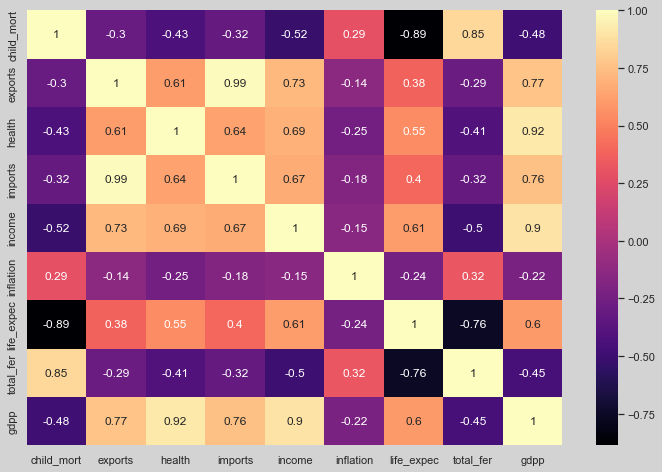

In [13]:
plt.figure(figsize= (12,8))
sns.heatmap(country.corr(), annot = True, cmap = "magma")

child_mortality and life_expentency are highly correlated with correlation of -0.89

child_mortality and total_fertility are highly correlated with correlation of 0.85

imports and exports are highly correlated with correlation of 0.99

life_expentency and total_fertility are highly correlated with correlation of -0.76

income and gdpp are highly correlated with correlation of 0.9

health and gdpp are highly correlated with correlation of 0.92

export/ import and gdpp are highyl correlated with correlation of 0.76/0.77

export and income are highly correlated with correlation of 0.73

In [14]:
#Due to this high correlation , we can apply the PCA in the dataset

Checking for the outliers

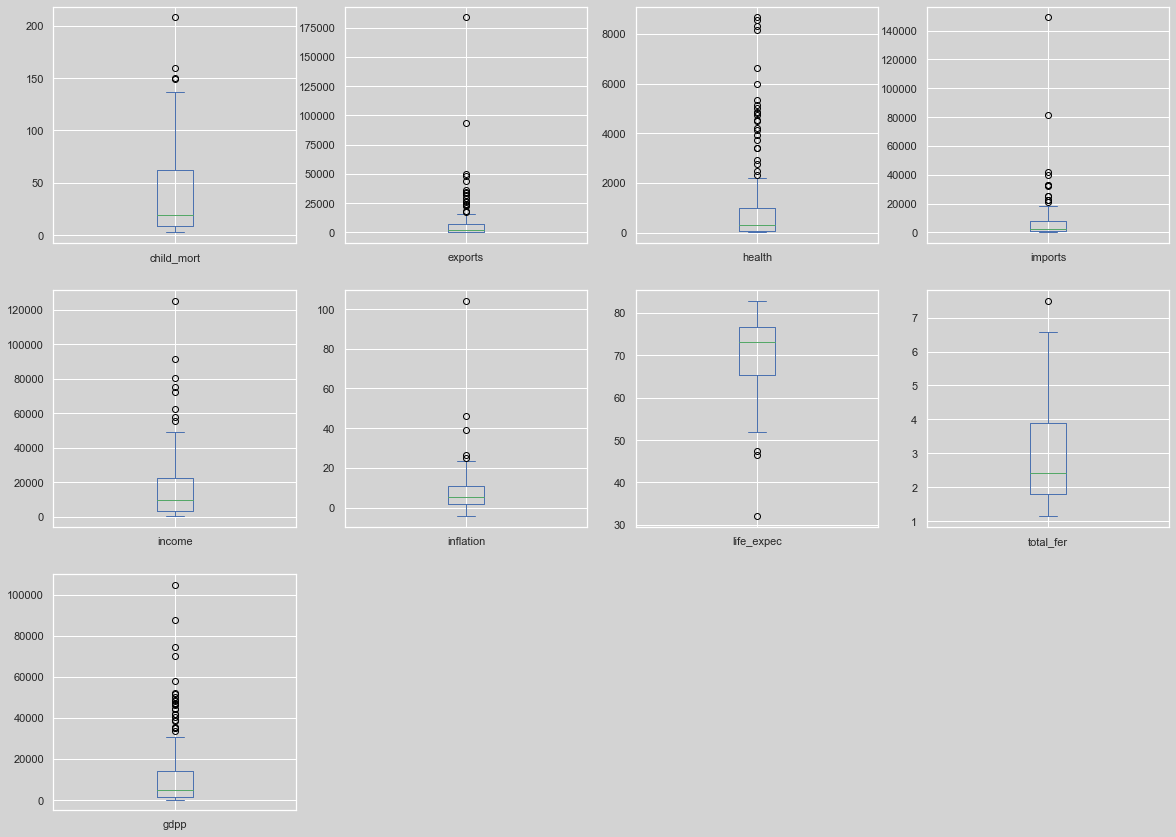

In [15]:
country.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

Here we can see that except life expectancy , all have outliers in the upper side

Since applying the PCA , not doing the outlier handling 

In [16]:
country_drop = country.drop('country', axis =1)
country_keep = country['country']

In [17]:
scaler = StandardScaler()
country_drop=scaler.fit_transform(country_drop)

In [18]:
df1 = pd.DataFrame(country_drop, columns = country.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [19]:
 df1.describe().T.style.background_gradient(cmap="YlOrRd")

,count,mean,std,min,25%,50%,75%,max
child_mort,167.000000,-0.000000,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.000000,0.000000,1.003008,-0.414037,-0.389145,-0.314910,-0.007959,9.839814
health,167.000000,-0.000000,1.003008,-0.581240,-0.544651,-0.409156,-0.044428,4.235432
imports,167.000000,0.000000,1.003008,-0.449160,-0.405554,-0.309734,0.077130,9.716681
income,167.000000,-0.000000,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.000000,0.000000,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.000000,0.000000,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.000000,0.000000,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.000000,0.000000,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


Applying PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(df1)

PCA(random_state=42, svd_solver='randomized')

In [21]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [22]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [23]:
colnames = list(df1.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6], 'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'Feature':colnames})
pca_df.style.background_gradient(cmap="YlOrRd")

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585,0.761267,0.006444,-0.004951,child_mort
1,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911,-0.013670,-0.055264,-0.717924,exports
2,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699,-0.064616,0.430072,-0.130346,health
3,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180,0.027182,0.131135,0.665687,imports
4,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147,-0.023113,0.393811,0.079011,income
5,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403,-0.022077,-0.006070,0.011281,inflation
6,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010,0.581208,0.002966,-0.031594,life_expec
7,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901,-0.273145,0.034293,0.023682,total_fer
8,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382,-0.044023,-0.799022,0.128464,gdpp


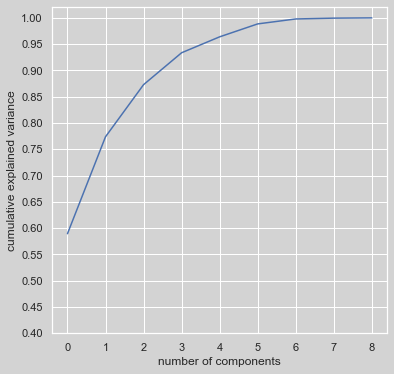

In [24]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

We can see that 4 principal components constitute to more than 95% of the variance

In [25]:
colnames = list(df1.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 
                       'Feature':colnames})
pca_df.style.background_gradient(cmap="YlOrRd")

,PC1,PC2,PC3,PC4,Feature
0,-0.316392,0.476267,-0.150012,-0.148052,child_mort
1,0.342887,0.397311,-0.030574,0.449425,exports
2,0.358535,0.155053,-0.075703,-0.599712,health
3,0.344865,0.370781,-0.072174,0.461798,imports
4,0.380041,0.128384,0.145764,-0.154806,income
5,-0.143085,0.221261,0.948419,-0.007628,inflation
6,0.343857,-0.369820,0.196752,-0.018395,life_expec
7,-0.302842,0.459715,-0.077834,-0.213928,total_fer
8,0.399988,0.200624,0.010339,-0.364772,gdpp


In [26]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
# we are using the incrementalPCA for better efficiency

In [27]:
df_final1 = pca_final.fit_transform(df1)
df_final1.shape

(167, 4)

We can see that we have reduced the dataset to 4 columns

In [28]:
df_final1 = pd.DataFrame(df_final1, columns=["PC1", "PC2","PC3","PC4"])
df_pca = pd.concat([country_keep, df_final1], axis=1)
df_pca.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


<AxesSubplot:>

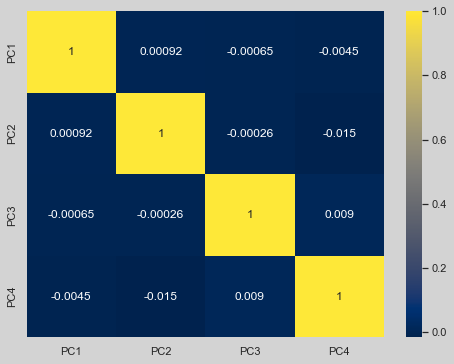

In [29]:
plt.figure(figsize = (8,6))        
sns.heatmap(df_pca.corr(),annot = True,cmap="cividis")

We are doing this correlation check to see if there is any depency still on the variables and we can see that correlation is very close to this 

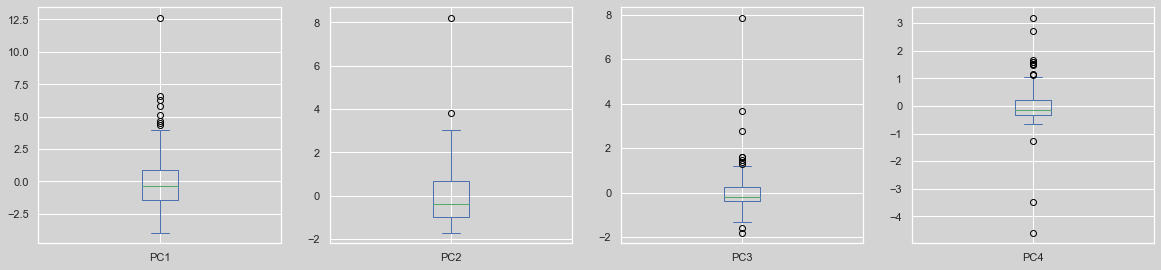

In [30]:
df_pca.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

In [31]:
# Statstical Outlier treatment for PC1

Q1 = np.percentile(df_pca["PC1"],25,interpolation = 'midpoint')
Q3 = np.percentile(df_pca["PC1"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df_pca["PC1"]=np.where(df_pca["PC1"]>upper_limit,upper_limit,np.where(df_pca["PC1"]<lower_limit,lower_limit,df_pca["PC1"]))

# Statstical Outlier treatment for PC2

Q1 = np.percentile(df_pca["PC1"],25,interpolation = 'midpoint')
Q3 = np.percentile(df_pca["PC1"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df_pca["PC2"]=np.where(df_pca["PC2"]>upper_limit,upper_limit,np.where(df_pca["PC2"]<lower_limit,lower_limit,df_pca["PC2"]))

# Statstical Outlier treatment for PC3
Q1 = np.percentile(df_pca["PC1"],25,interpolation = 'midpoint')
Q3 = np.percentile(df_pca["PC1"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df_pca["PC3"]=np.where(df_pca["PC3"]>upper_limit,upper_limit,np.where(df_pca["PC3"]<lower_limit,lower_limit,df_pca["PC3"]))

# Statstical Outlier treatment for PC4
Q1 = np.percentile(df_pca["PC1"],25,interpolation = 'midpoint')
Q3 = np.percentile(df_pca["PC1"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df_pca["PC4"]=np.where(df_pca["PC4"]>upper_limit,upper_limit,np.where(df_pca["PC4"]<lower_limit,lower_limit,df_pca["PC4"]))

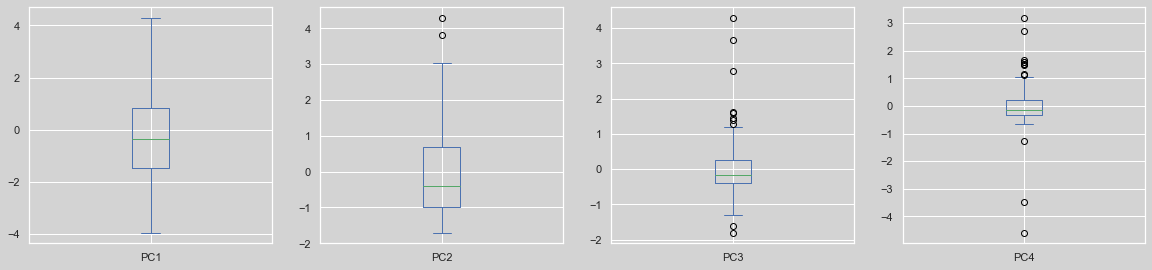

In [32]:
df_pca.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

In [33]:
#Outliers have been handled

In [34]:
df_pca1=df_pca.drop(["country"],axis=1)
df_pca1.shape

(167, 4)

Hopkins Statistics Test

A way of measuring the cluster tendency of a data set.

A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

In [35]:
from pyclustertend import hopkins
hopkins(df_pca1,167)

0.13515160342987745

In [36]:
#Since the value is > 0.7 the given dataset has a good tendency to form clusters.

Building model

Silhoutte score check

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

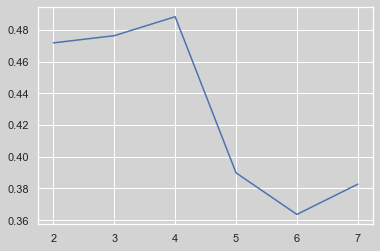

In [37]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(df_pca1)
    sse_.append([k, silhouette_score(df_pca1, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

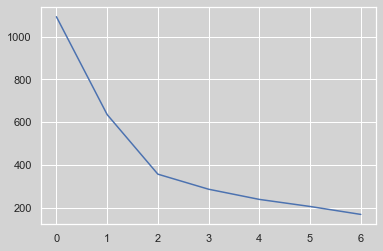

In [38]:
ssd = []
for num_clusters in list(range(1,8)):
    model_cluster = KMeans(n_clusters = num_clusters, max_iter=100)
    model_cluster.fit(df_pca1)
    ssd.append(model_cluster.inertia_)

plt.plot(ssd)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

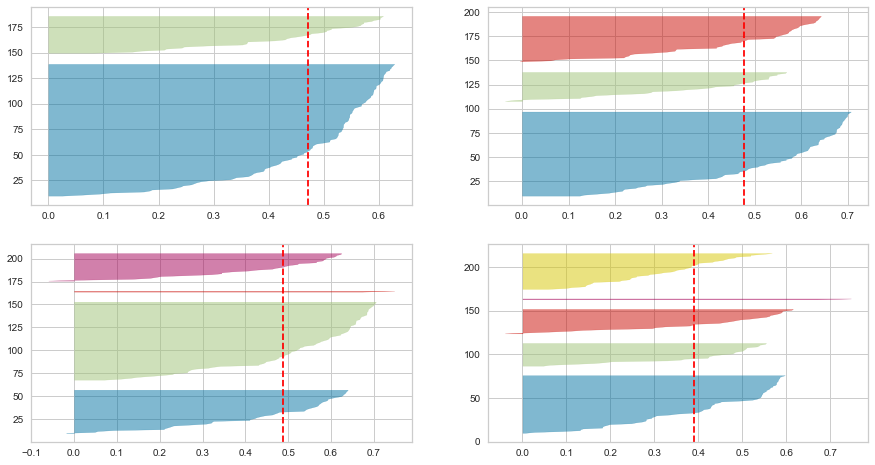

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer


fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i,2)

    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca1)

From silhoute scores, silhoutte visualiser and elbow methos, we can see that cluster should be either 3 or 4 . But proceeding with 3 , since the 4th cluster when done has only 2 outcomes

In [40]:
clus_model= KMeans(n_clusters = 3, max_iter=50,random_state = 100)
clus_model.fit(df_pca1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3, random_state=100)

In [41]:
clus_model.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [42]:
df_pca["cluster id"]=clus_model.labels_
df_pca.head().style.background_gradient(cmap="BuPu")

,country,PC1,PC2,PC3,PC4,cluster id
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,2
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,-2.723581,2.176018,0.597794,0.438919,2
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1


In [43]:
df_pca['cluster id'].value_counts()

1    88
2    48
0    31
Name: cluster id, dtype: int64

cluster 1 is more populated and 2 and 3 are almost of same measure

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

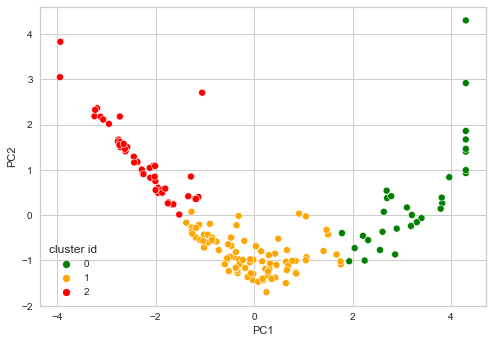

In [44]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='cluster id',legend='full',data=df_pca, palette=['green','orange','red'])

<AxesSubplot:xlabel='PC3', ylabel='PC4'>

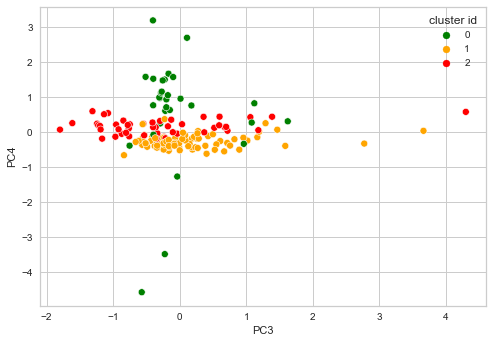

In [45]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='cluster id',legend='full',data=df_pca,palette=['green','orange','red'])

In [46]:
#From the above 2 graphs , we can see that the clusters are forming 
#1st graph shows there is some gaps in cluster 0 , but 1 and 2 are closely clustered
#2nd one shows clsuter points closely confirmed
# Proceeding with 3 as when 4 clusters are formed , 4th one has only 2 datapoints - so which is of no use/ difference

In [47]:
# merge b/w km df and actually data
country_merge=pd.merge(country,df_pca,left_index=True,right_index=True )
country_merge.head()

,country_x,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_y,PC1,PC2,PC3,PC4,cluster id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Albania,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Angola,-2.723581,2.176018,0.597794,0.438919,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1


In [48]:
country_merge=country_merge.drop(["country_y"],axis=1)
country_merge.rename(columns = {'country_x':'country'}, inplace = True)
country_merge.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723581,2.176018,0.597794,0.438919,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,1


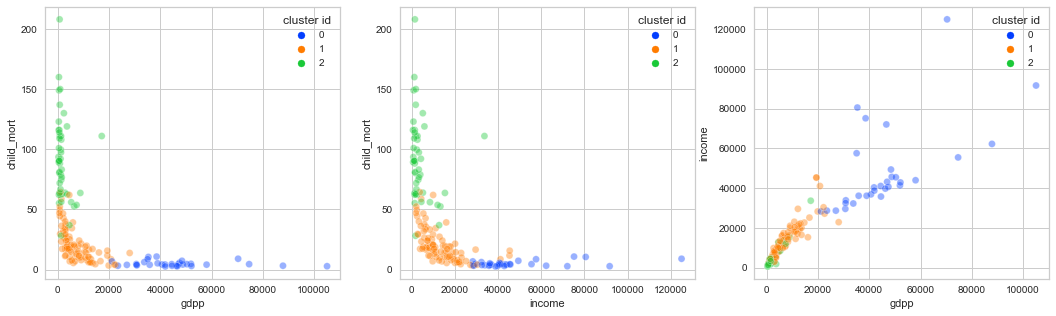

In [49]:

country_analyse=country_merge.drop(["PC1","PC2","PC3","PC4"],axis=1)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster id', data=country_analyse, palette="bright", alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster id',data=country_analyse, palette="bright", alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster id', data=country_analyse, palette="bright", alpha=.4)

plt.show()

In [50]:
#From the graph , we get idea that cluster 0 is having high gdp and income and low child mortality 

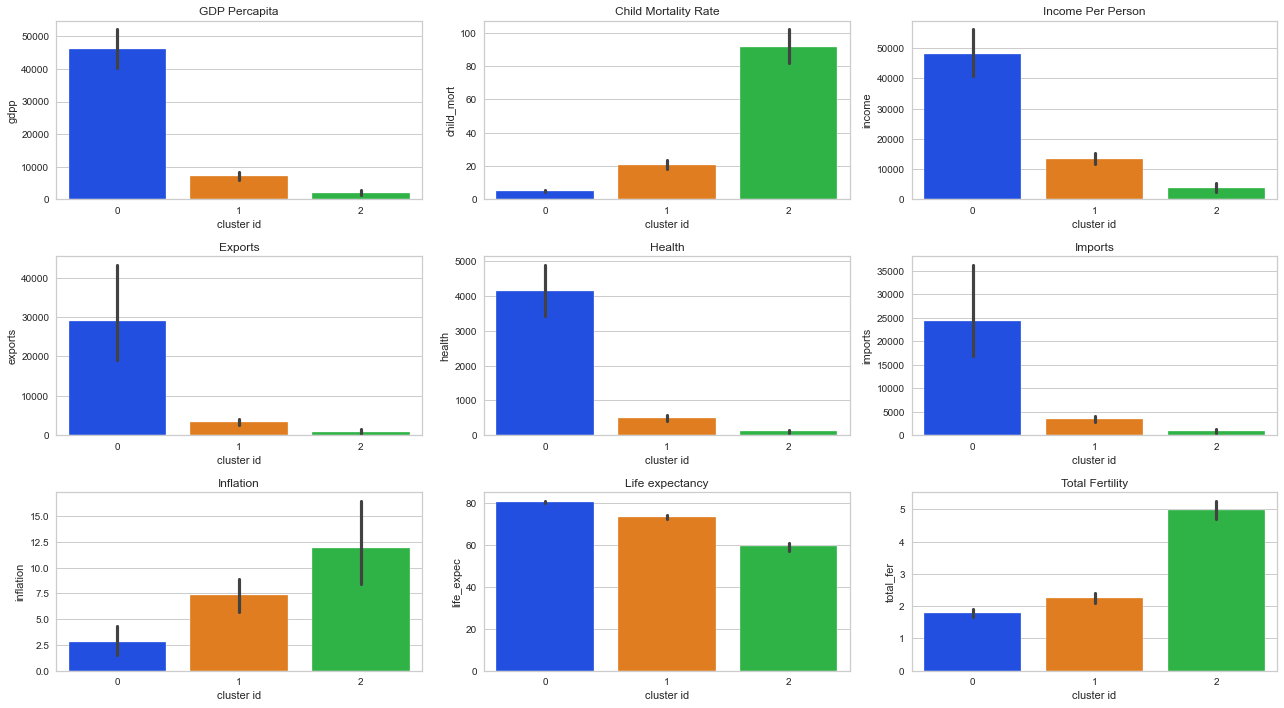

In [51]:
# visualising clusters
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
sns.barplot(x = 'cluster id', y = 'gdpp', data=country_analyse, palette="bright")
plt.title('GDP Percapita')

plt.subplot(3,3,2)
sns.barplot(x = 'cluster id', y = 'child_mort', data=country_analyse, palette="bright")
plt.title('Child Mortality Rate')

plt.subplot(3,3,3)
sns.barplot(x = 'cluster id', y = 'income', data=country_analyse, palette="bright")
plt.title('Income Per Person')

plt.subplot(3,3,4)
sns.barplot(x = 'cluster id', y = 'exports', data=country_analyse, palette="bright")
plt.title('Exports')

plt.subplot(3,3,5)
sns.barplot(x = 'cluster id', y = 'health', data=country_analyse, palette="bright")
plt.title('Health')

plt.subplot(3,3,6)
sns.barplot(x = 'cluster id', y = 'imports', data=country_analyse, palette="bright")
plt.title('Imports')

plt.subplot(3,3,7)
sns.barplot(x = 'cluster id', y = 'inflation', data=country_analyse, palette="bright")
plt.title('Inflation')

plt.subplot(3,3,8)
sns.barplot(x = 'cluster id', y = 'life_expec', data=country_analyse, palette="bright")
plt.title('Life expectancy')

plt.subplot(3,3,9)
sns.barplot(x = 'cluster id', y = 'total_fer', data=country_analyse, palette="bright")
plt.title('Total Fertility')

plt.tight_layout()

plt.show()

From the 1st row 3 graphs we can understand

- the cluster 2 having highest Child Mortality and lowest Income & GDPP and comes under undeveloped countries
- cluster 0 has the highest GDP and income , so it comes under developed countries
- cluster 1 is in middle and comes under developing country

From 2nd row 3 graphs we can understand
- imports , health and exports are being topped with cluster 0 , which again reconfirms our interpretation
- cluster 2 is having the least

From 3rd row 3 graphs,
- inflation and total fertility rate is higher for cluster 2 and life expectancy is less
- cluster 0 has less inflation and fertiility rates with life expectancy on higher side

In [52]:
# Checking the cluster means and confirming our interpratation
results=country_analyse.groupby(['cluster id']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
results.style.background_gradient(cmap="BuPu")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster id,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364
0,4.935484,29057.154839,4144.128710,24385.519355,48129.032258,2.769903,80.506452,1.786452,46067.741935


from the above , we can again confirm that cluster 2 is underdeveloped , cluster 0 is developed and cluster 1 is developing

<Figure size 1080x720 with 0 Axes>

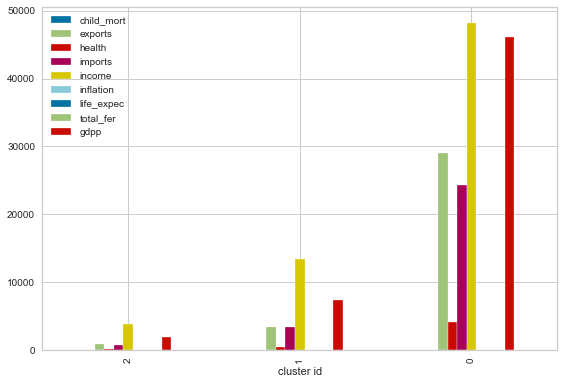

In [53]:
plt.figure (figsize = (15,10))

results.plot.bar()

plt.tight_layout()
plt.show()

The clusters showing the overall features with mean values compared

In [54]:
#Finding the top 10 underdeveloped countries

In [56]:
K_cluster_Undeveloped = country_analyse[country_analyse['cluster id']== 2]
K_top10 = K_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(10)

print( 'Top 10 countries in need of aid  based on K means cluster are as below :')
K_top10['country'].to_frame()

Top 10 countries in need of aid  based on K means cluster are as below :


,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea
